In [1]:
import zntrack
import matplotlib.pyplot as plt
import numpy as np

In [2]:
volume_scans = [zntrack.from_rev("evaluation_BoxScale")]
volume_scans.extend([zntrack.from_rev(f"evaluation_BoxScale_{x}") for x in range(1, 11)])

dft = zntrack.from_rev("volume_scan_CP2KSinglePoint_1")

2023-08-08 14:37:10,271 (DEBUG): Welcome to IPS - the Interatomic Potential Suite!


/tmp/ipykernel_711123/1399937268.py:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


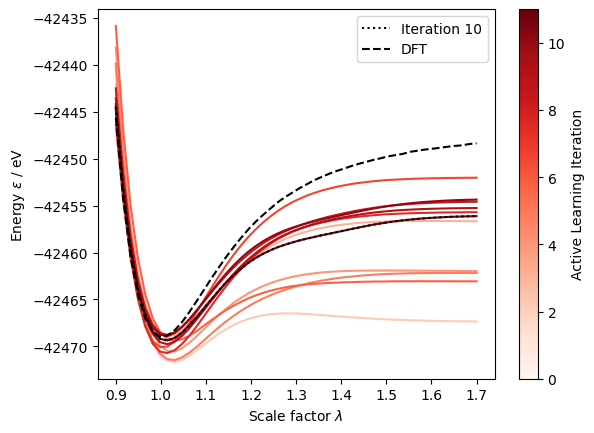

In [3]:
fig, ax = plt.subplots()


colors = plt.cm.Reds(np.linspace(0.2, 1, len(volume_scans)))

for idx, vs in enumerate(volume_scans):
    energies = [x.get_potential_energy() for x in vs.atoms]

    ax.plot(np.linspace(volume_scans[0].start, volume_scans[0].stop, volume_scans[0].num), energies, color=colors[idx])


ax.plot(np.linspace(volume_scans[0].start, volume_scans[0].stop, volume_scans[0].num), energies, color="black", ls=":", label=f"Iteration {len(volume_scans) - 1}")

# ax.set_xlim(0.90, 1.50)

energies = [x.get_potential_energy() for x in dft.atoms]
ax.plot(np.linspace(0.9, 1.7, len(energies)), energies, label="DFT", color="black", ls="--")
# add a color bar to the side
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=len(volume_scans)))
cbar = fig.colorbar(sm)
cbar.set_label("Active Learning Iteration")

ax.set_ylabel(r"Energy $\epsilon $ / eV")
ax.set_xlabel(r"Scale factor $\lambda $")


ax.legend()
# fig.savefig("energy_vs_scale_factor.png", bbox_inches ="tight", dpi=300)

In [6]:
metrics = [zntrack.from_rev("evaluation_PredictionMetrics")]
metrics.extend([zntrack.from_rev(f"evaluation_PredictionMetrics_{x}") for x in range(1, 11)])

Text(0.5, 0, 'AL iteration')

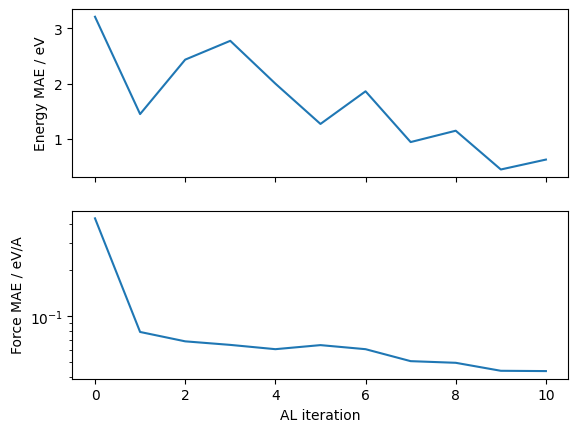

In [21]:
fig, ax = plt.subplots(2, 1, sharex=True)
data = [x.energy["mae"] for x in metrics]
ax[0].plot(data)
ax[0].set_ylabel("Energy MAE / eV")

data = [x.forces["mae"] for x in metrics]
ax[1].plot(data)
ax[1].set_yscale("log")
ax[1].set_ylabel("Force MAE / eV/A")
ax[1].set_xlabel("AL iteration")